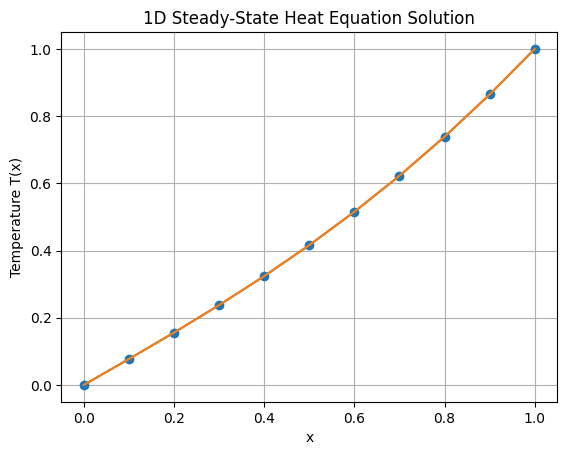

In [ ]:
import numpy as np # import numpy library
import matplotlib.pyplot as plt # import matplotlib for


a=0 #lower limit in x domain
b=1 #upper limit in x domain

u1=0 # Dirichlet boundary condition at a=0, u(0)=0
u2=1 # Dirichlet boundary condition at b=1, u(1)=1

N=9 # Number of points we are solving for

h=(b-a)/(N+1) # defining grid size


x=np.linspace(a,b,N+2) # defining x grid

f = lambda x1 : np.sin(np.pi*x1/2) # defining external heat source/sink

true_solution= lambda x1: - (4 / np.pi**2) * np.sin((np.pi * x1) / 2) + (1 + 4 / np.pi**2) * x1 # defining the true solution

main_diag = -2 * np.ones(N ) # Defining the main diagonal off A
off_diag = np.ones(N - 1) # Defining the diagonal directly above and below the main diagonal
A = np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1) # creating the tridiagonal matrix
A *= 1/ h**2 # multiplying by one over the grid size squared to get correct finite difference method


B = f(x[1:-1]) # Righthand side to update f(x)
B[0] -= u1 / h**2 # updating right hand side with the boundary condition u(0)=u1
B[-1] -= u2 / h**2# updating right hand side with the boundary condition u(1)=u2

u_internal = np.linalg.solve(A, B) # solve Au=B

u_full = np.concatenate(([u1], u_internal, [u2])) # adding the boundary conditions to the approximated solution


plt.plot(x, u_full, marker='o') # plot approximated solution
plt.plot(x, true_solution(x)) # plot true solution
plt.xlabel('x') # x label is named x
plt.ylabel('Temperature T(x)') # y label is named temperature
plt.title('1D Steady-State Heat Equation Solution') # title of plot
plt.grid(True) # add a grid
plt.show() # show the plot


0.01


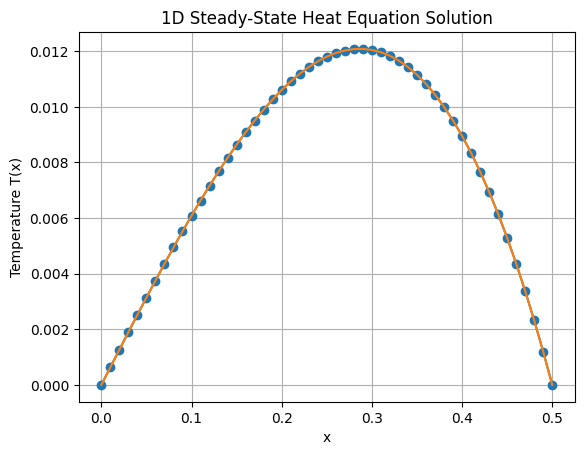

In [ ]:
import numpy as np # import numpy library
import matplotlib.pyplot as plt # import matplotlib for plotting

true_solution = lambda x: (4/np.pi**2) * np.sin((np.pi * x) / 2) - (4*np.sqrt(2)/np.pi**2) * x

a=0 #lower limit in x domain
b=0.5 #upper limit in x domain

u1=0 # Dirichlet boundary condition at a=0, u(0)=0
u2=0 # Dirichlet boundary condition at b=0.5, u(0.5)=1 ### UPDATE

N=49 # Number of points we are solving for ### UPDATE

h=(b-a)/(N+1) # defining grid size

print(h)

x=np.linspace(a,b,N+2) # defining x grid

f = lambda x1 : -np.sin(np.pi*x1/2) # defining external heat source/ ### UPDATE

main_diag = -2 * np.ones(N ) # Defining the main diagonal off A
off_diag = np.ones(N - 1) # Defining the diagonal directly above and below the main diagonal
A = np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1) # creating the tridiagonal matrix
A *= 1/ h**2 # multiplying by one over the grid size squared to get correct finite difference method


B = f(x[1:-1]) # Righthand side to update f(x)
B[0] -= u1 / h**2 # updating right hand side with the boundary condition u(0)=u1
B[-1] -= u2 / h**2# updating right hand side with the boundary condition u(1)=u2

u_internal = np.linalg.solve(A, B) # solve Au=B

u_full = np.concatenate(([u1], u_internal, [u2])) # adding the boundary conditions to the approximated solution


plt.plot(x, u_full, marker='o') # plot approximated solution
plt.plot(x, true_solution(x)) # plot approximated solution
plt.xlabel('x') # x label is named x
plt.ylabel('Temperature T(x)') # y label is named temperature
plt.title('1D Steady-State Heat Equation Solution') # title of plot
plt.grid(True) # add a grid
plt.show() # show the plot


0.002497559193064325


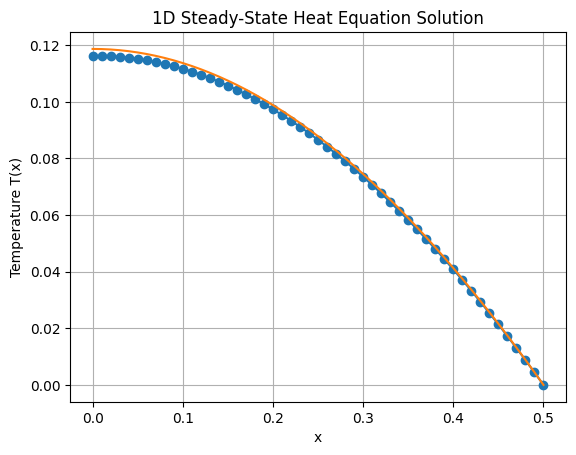

In [1]:
import numpy as np # import numpy library
import matplotlib.pyplot as plt # import matplotlib for plotting

true_solution= lambda x1:  (4/np.pi**2) * np.cos((np.pi * x1) / 2) - (2*np.sqrt(2) / np.pi**2)


a=0 #lower limit in x domain
b=0.5 #upper limit in x domain ### UPDATE

u2=0 # upper dirichlet boundary conditions ### UPDATE

N=49 # Number of points we are solving for

h=(b-a)/(N+1) # defining grid size

x=np.linspace(a,b,N+2) # defining x grid

f = lambda x1 : -np.cos(np.pi*x1/2) # defining external heat source/sink ###UPDATE

main_diag = -2 * np.ones(N ) # Defining the main diagonal off A
off_diag = np.ones(N - 1) # Defining the diagonal directly above and below the main diagonal
A = np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1) # creating the tridiagonal matrix
A[0,0]=-1 # update nuemann boundary condition in matrix A  ### UPDATE
A *= 1/ h**2 # multiplying by one over the grid size squared to get correct finite difference method


B = f(x[1:-1]) # Righthand side to update f(x)
#B[0] -= u1 / h**2 # updating right hand side with the boundary condition u(0)=u1 #### UPDATE
B[-1] -= u2 / h**2# updating right hand side with the boundary condition u(1)=u2

u_internal = np.linalg.solve(A, B) # solve Au=B

u_full = np.concatenate(([u_internal[0]], u_internal, [u2])) # adding the boundary conditions to the approximated solution, including Nuemann BC

E=np.max(abs(u_full-true_solution(x)))
print(E)
plt.plot(x, u_full, marker='o') # plot approximated solution
plt.plot(x, true_solution(x)) # plot approximated solution
plt.xlabel('x') # x label is named x
plt.ylabel('Temperature T(x)') # y label is named temperature
plt.title('1D Steady-State Heat Equation Solution') # title of plot
plt.grid(True) # add a grid
plt.show() # show the plot


[[-2.  1.  0. ...  0.  0.  1.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 1.  0.  0. ...  0.  1. -2.]]
-0.003996774800577858


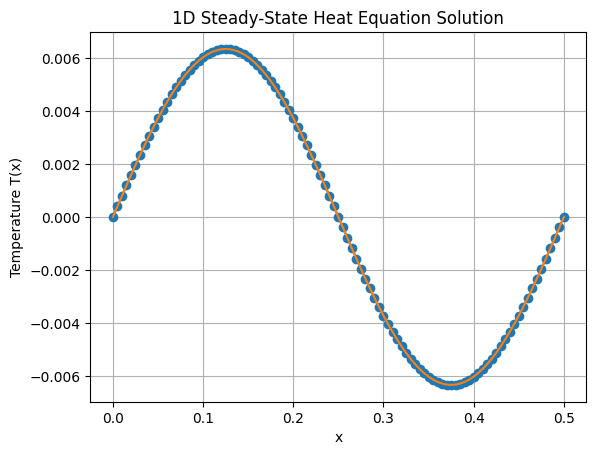

In [ ]:
import numpy as np # import numpy library
import matplotlib.pyplot as plt # import matplotlib for plotting

true_solution= lambda x1: 1 / (16*np.pi**2) * np.sin(4*(np.pi * x1) )
a=0 #lower limit in x domain
b=0.5 #upper limit in x domain ### UPDATE

N=99 # Number of points we are solving for ### UPDATE

h=(b-a)/(N+1) # defining grid size

x=np.linspace(a,b,N+2) # defining x grid

f = lambda x1 : -np.sin(4*np.pi*x1) # defining external heat source/sink ### UPDATE

main_diag = -2 * np.ones(N+1 ) # Defining the main diagonal off A
off_diag = np.ones(N ) # Defining the diagonal directly above and below the main diagonal
A = np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1) # creating the tridiagonal matrix
A[0,-1]=1 # Defining periodic boundary conditions ### UPDATE
A[-1,0]=1 # Defining periodic boundary conditions ### UPDATE
print(A)

A *= 1/ h**2 # multiplying by one over the grid size squared to get correct finite difference method



B = f(x[0:-1]) # Righthand side to update f(x), include first element for boundary condition ### UPDATE

u_internal = np.linalg.solve(A, B) # solve Au=B



u_full = np.concatenate(( u_internal, [u_internal[0]])) # adding the boundary conditions to the approximated solution  ### UPDATE

u_avg=sum(u_full)/len(u_full) #### NOT INCLUDED IN HW BUT TAKING AVERAGE
print(u_avg)
plt.plot(x, u_full-u_avg, marker='o') # plot approximated solution m
plt.plot(x, true_solution(x)) # plot approximated solution

plt.xlabel('x') # x label is named x
plt.ylabel('Temperature T(x)') # y label is named temperature
plt.title('1D Steady-State Heat Equation Solution') # title of plot
plt.grid(True) # add a grid
plt.show() # show the plot